# Testing statistical hypotheses

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

## Task 1

$X_1, ..., X_n$ $-$ sample from the distribution $\mathscr{N}(a_1, \sigma^2)$, $Y_1, ..., Y_m$ $-$ sample from the distribution $\mathscr{N}(a_2, \sigma^2)$, and $Z_1, ..., Z_k$ $-$ sample from the distribution $\mathscr{N}(a_3, \sigma^2)$. Construct an $F$ - test size of $\alpha$ to test hypothesis $H_0$: $a_1 = a_2$ and $a_1 + a_2 = a_3$ for an unknown $\sigma^2$.

Сheck the test you built. Consider $\sigma^2 = 1$.

consider three settings with different $a_i$ values:

$-$ when the hypothesis is fulfilled,

$-$ when the hypothesis is "almost" fulfilled,

$-$ when the hypothesis fails.

a) Fix the values $n = 100, m = 150, k = 300$. For each experiment, numerically determine the minimum significance level of the test at which the $H_0$ hypothesis is rejected. Visualize the corresponding quantiles on the Fisher distribution graph. The inverse distribution function implemented in $\textbf{scipy.stats}$ can help you in this task.

b) Fix $n = m = k = N$, where $N$ varies between $1$ and $1000$. Build a $\alpha(N)$ graph for each of the three experiments, where $\alpha(N) -$ minimum significance level of the test at which a hypothesis $H_0$ is rejected.

Matrices for testing can be calculated numerically. Don't forget to describe the calculation algorithms and draw conclusions.

## Solution

Let's build an $F$-test of the significance level of $\alpha$  to test the hypothesis of $H_0$. Let's make a vector $W = (X_1, ..., X_n, Y_1, ..., Y_m, Z_1, ..., Z_k)^T = (W_1, ..., W_{n+m+k})$ and consider a linear model $W=Z\theta$, where
$$\theta = (a_1, a_2, a_3)^T$$ and $$
    Z^T = \left(\begin{array}{cc} 
        1  ...  1  0  .....  ...  ...  0 \\
        0  ...  0  1  . .... 1  0  ...  0 \\
        \underbrace{0  ...  .}_{n} \underbrace{...  ...  0}_{m}  \underbrace{1  ... 1}_{k}
        \end{array}\right).$$
        
The assumption of a hypothesis can be represented as: $T\theta = \tau$, where $\tau = 0$ and $$T = \left(\begin{array}{cc} 
                            1 & -1 & 0\\
                            1 & 1 & -1\\
                        \end{array}\right).$$
                        
In this way,
$$F_T = \frac{\hat{t}^TB^{-1}\hat{t}}{\Vert W - Z\hat{\theta}\Vert^2}\frac{n + m + k - 3}{2},$$
where $$B = T(Z^TZ)^{-1}T^T,$$ $\hat{t} = T\hat{\theta}$ и $\hat{\theta} = (Z^TZ)^{-1}Z^TW$.

### Paragraph A

Let's fix the values of samples sizes

In [2]:
n = 100
m = 150
k = 300

Let's consider the first case when the hypothesis is fulfilled. Set the appropriate parameter values and generate a selection.

In [3]:
a_1_true = 1
a_2_true = 1
a_3_true = 2

first_true = sps.norm.rvs(a_1_true, 1, size=n)
second_true = sps.norm.rvs(a_2_true, 1, size=m)
third_true = sps.norm.rvs(a_3_true, 1, size=k)

Based on the type of $F$-test, the desired $\alpha$ can be expressed as:

$$\alpha = P(F_T > u_{1-\alpha}) = 1 - P(F_T \leqslant u_{1-\alpha}) = 1 - F_{(2, n+m+k-3)}(F_T),$$
where $F_{(2, n+m+k-3)}$ - a function of the Fisher distribution.

Let's create a function that will calculate the value of statistics $F_T$ according to the above formulas and return the value of the minimum significance level $\alpha$ as the value of the inverse Fisher distribution function at the point $F_T$.

In [1]:
def size_test(first_sample, second_sample, third_sample, n, m, k):
    W = first_sample
    W = np.append(W, second_sample)
    W = np.append(W, third_sample)

    Z = np.zeros((n + m + k, 3))
    Z[0:n, 0] = 1
    Z[n:(n+m), 1] = 1
    Z[(n+m):(n+m+k), 2] = 1

    T = np.array([[1, -1, 0], [1, 1, -1]])

    B = T @ np.linalg.inv(Z.T @ Z) @ T.T
    theta = np.linalg.inv(Z.T @ Z) @ Z.T @ W
    t = T @ theta

    F_T = ((n + m + k - 3) / (2 * np.linalg.norm(W - Z @ theta)**2
                             )) * (t.T @ np.linalg.inv(B) @ t)
    return sps.f.sf(F_T, 2, n+m+k-3)

Let's create a function that will help us plot the Fisher distribution density $F_{(2, n+m+k-3)}$, and also mark the quantiles corresponding to the found minimum significance levels.

In [5]:
def plot_density_with_quantile(alpha):
    x = np.linspace(sps.f.ppf(0.01, 2, n+m+k-3), sps.f.ppf(0.99, 2, n+m+k-3), 10000)

    y1 = sps.f.pdf(x, 2, n+m+k-3)
    y2 = sps.f.ppf(1 - alpha, 2, n+m+k-3)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, y1, label='Dstribution density')
    
    plt.fill_between(x, y1, 0, where=y2>x, alpha=0.3)
    plt.vlines(y2, 0, 1, colors = 'r', label='$1-\\alpha$ quantile')
    
    plt.title('$1-\\alpha$ - quantile and the density of the Fisher distribution')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    plt.legend()
    plt.grid(ls=':')
    plt.show()

We get the value of the minimum significance level in the first case.

In [6]:
alpha_true = size_test(first_true, second_true, third_true, n, m, k)
alpha_true

0.4684774438719286

Let's draw the corresponding $(1 - \alpha)$ - quantile on the distribution density graph in the first case.

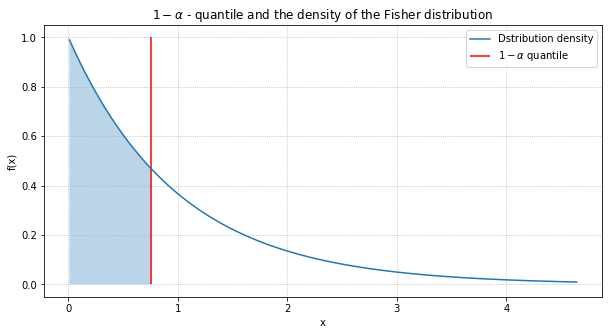

In [7]:
plot_density_with_quantile(alpha_true)

Let's move on to the second case. Let's set parameters at which the hypothesis is "almost" fulfilled.

In [8]:
a_1_almost = 1.01
a_2_almost = 1
a_3_almost = 1.99

first_almost = sps.norm.rvs(a_1_almost, 1, size=n)
second_almost = sps.norm.rvs(a_2_almost, 1, size=m)
third_almost = sps.norm.rvs(a_3_almost, 1, size=k)

We get the value of the minimum significance level at which the null hypothesis is rejected and re-plot it.

In [9]:
alpha_almost = size_test(first_almost, second_almost, third_almost, n, m, k)
alpha_almost

0.6735939879172026

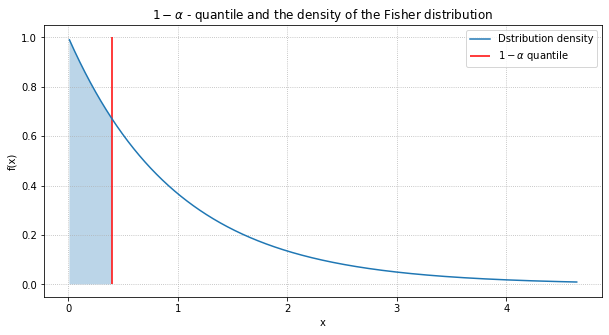

In [10]:
plot_density_with_quantile(alpha_almost)

Finally, we take the parameters for which the initial hypothesis is not correct.

In [11]:
a_1_false = 2
a_2_false = 1
a_3_false = 3

first_false = sps.norm.rvs(a_1_false, 1, size=n)
second_false = sps.norm.rvs(a_2_false, 1, size=m)
third_false = sps.norm.rvs(a_3_false, 1, size=k)

Let's calculate the size of the test again and build a graph for the third case.

In [12]:
alpha_false = size_test(first_false, second_false, third_false, n, m, k)
alpha_false

3.666608557525181e-14

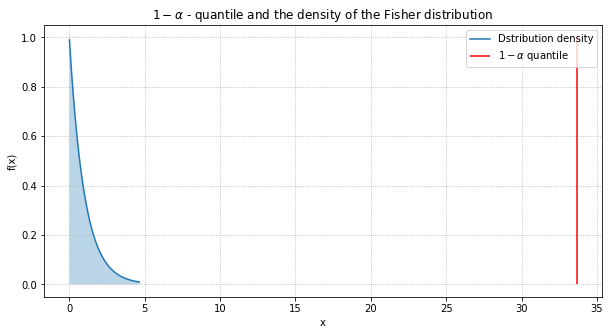

In [13]:
plot_density_with_quantile(alpha_false)

### Paragraph B

Set a value for the maximum sample size and declare an array where we will store the calculated values of the minimum significance levels.

In [14]:
N = 1000

alpha_arr = np.zeros(N-1)

Let's create a function that will get the values of the minimum significance levels for sample sizes from $2$ to $1000$ using the function already described above. We do not consider the case with a single element, since in this case the second parameter of the Fisher distribution will become zero, which is incorrect.

In [15]:
def tests(a_1, a_2, a_3):
    for i in range(2, N+1):
        first = sps.norm.rvs(a_1, 1, size=i)
        second = sps.norm.rvs(a_2, 1, size=i)
        third = sps.norm.rvs(a_3, 1, size=i)

        alpha_arr[i-2] = size_test(first, second, third, i, i, i)
    return alpha_arr

The function described below plots the dependence of the minimum significance level on the sample size.

In [16]:
def plot_alpha_and_size(alpha_arr):
    x = np.linspace(2, 1000, 999)

    plt.figure(figsize=(10, 5))
    plt.plot(x, alpha_arr)

    plt.title('Dependence of the minimum significance level on the sample size')
    plt.xlabel('Number $N$ of sample elements')
    plt.ylabel('The minimum significance level $\\alpha$')
    plt.grid(ls=':')
    plt.show()

We get an array of criterion sizes for the first case when the hypothesis is fulfilled. The parameter values are the same as in the case of $A$ (we will do the same later). Let's build a graph.

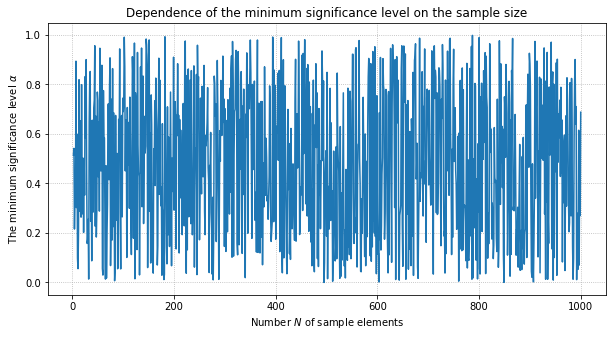

In [17]:
alpha_arr_true = tests(a_1_true, a_2_true, a_3_true)
plot_alpha_and_size(alpha_arr_true)

Observing such a spread of values, it is interesting to look at the histogram in this case. To do this, implement the corresponding function.

In [18]:
def build_hist(alpha_arr):
    plt.figure(figsize=(10, 5))
    plt.hist(alpha_arr, density=True)

    plt.title('Normalized histogram of the minimum significance levels.')
    plt.xlabel('Value of $\\alpha$')
    plt.ylabel('Share of the number of values')
    plt.grid(ls=':')
    plt.show()

Let's build a histogram of the values of the minimum significance levels for the first case.

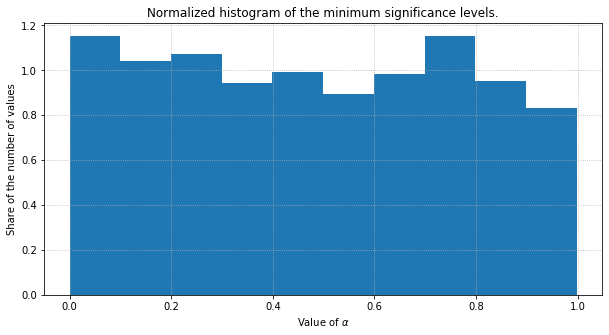

In [19]:
build_hist(alpha_arr_true)

Observe the dependence of $\alpha(N)$ in the second case.

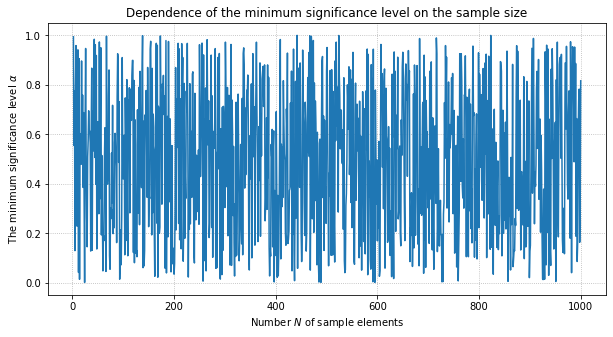

In [20]:
alpha_arr_almost = tests(a_1_almost, a_2_almost, a_3_almost)
plot_alpha_and_size(alpha_arr_almost)

Here, too, it makes sense to build a histogram.

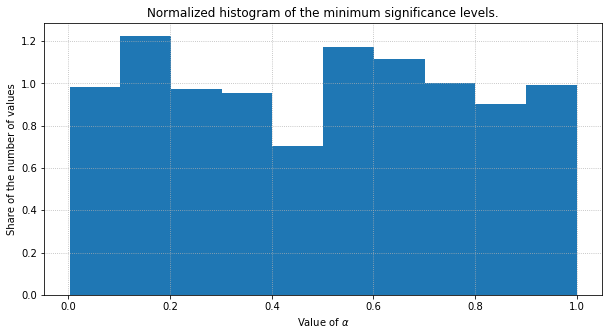

In [21]:
build_hist(alpha_arr_almost)

Finally, let's look at the values of $\alpha$ for different sample sizes in the third case.

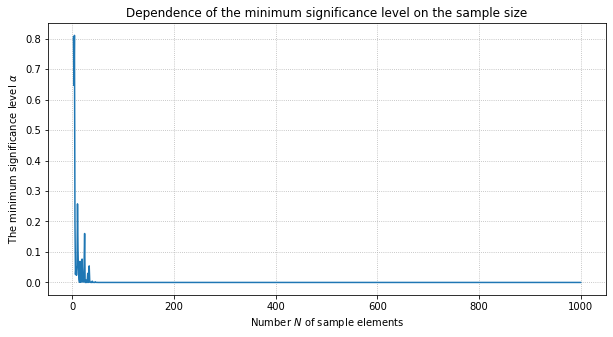

In [22]:
plot_alpha_and_size(tests(a_1_false, a_2_false, a_3_false))

## Conclusion

As a result of the first part of the work, in three cases, the minimum significance levels (dimensions) of the test were numerically determined, in which the $H_0$ hypothesis is rejected. Graphs with corresponding quantiles were obtained.

In the first and second cases, there is some similarity in the results, but the values of the minimum significance level were different for different program launches. This means that if the hypothesis being tested is correct, we can't say anything definite about it in the end. Our goal is to reject the original hypothesis in favor of an alternative, since we want to minimize the second kind of error. The value of the minimum significance level we obtained (in fact, the $p$value) does not allow us to do this.

In the case of an incorrect hypothesis, we get very small values of the minimum level of significance, which means that we can more confidently reject this hypothesis in accordance with the test.

The constructed graphs of the dependencies of the test size on the number of sample elements only confirm our initial conclusions. In the first two cases, we observed a uniform or almost uniform spread of the criterion size values. The constructed normalized histograms can serve as a basis for the assumption that the minimum levels of significance in these cases have a uniform distribution on the segment $[0, 1]$. Note that this is true for the first case, which is proved theoretically.

In the latter case, we observe a pattern when, even with small sample values, we can confidently reject our hypothesis as incorrect.

## Task 2

Let $X_1, ..., X_n -$ sample from the distribution $\mathscr{N}(\theta, 1)$. Construct (that is, including plotting it) the function of power of the Student test for testing of hypothesis $H_0$: $\theta = 0$ with a significance level of $0.05$ for $\theta \in [-10, 10]$, with several different values of $n$. How do I explain its changes with growing $n$?

Find a minimum $n$ such that when $|\theta_0 - \theta_1| = 1$ when testing the hypothesis $H_0$: $\theta = \theta_0$ against the alternative $H_1$: $\theta = \theta_1$ by the Student's test of the significance level $0.05$, the probability of a second-order error becomes less than the probability of a first-order error.

## Solution

The Student test for $H_0: \theta = 0$ has the form:
$$\left|\sqrt{n-1}\frac{\overline{X} - 0}{s}\right| > t_{1-\alpha/2},$$
where $t_{1-\alpha/2}$ is the quantile of the Student distribution with the degree of freedom $n-1$. You need to find the values of the power function $$\beta(P_\theta, S) = P_\theta(X \in S) = P_\theta\left(\left|\sqrt{n-1}\frac{\overline{X}}{s}\right| > t_{1-\alpha/2}\right),$$ for $\theta \in [-10, 10]$.

Declare a variable containing the significance level and set the set of sample sizes to be considered.

In [23]:
alpha = 0.05
N = [10, 20, 50, 150, 1000]

In this case, we need to explicitly calculate the power function as the probability that the Student's modulo statistics are greater than $(1 - \alpha/2)$ - quantile.

Let's create a function that will calculate the value of Student statistics for a fixed sample size and the value of $\theta$.

In [24]:
def calculate_Student(n, theta, theta_0=0):
    #table where rows are samples for the same theta and n
    sample_table = sps.norm.rvs(loc=theta, scale=1, size=(10**4, n), random_state=None)
    mean = np.mean(sample_table, axis=1)
    s_squared = np.var(sample_table, axis=1)
        
    return np.abs(np.sqrt(n-1)*(mean - theta_0)/np.sqrt(s_squared))

We will generate a sufficiently large number of samples from the normal law for each $ \theta$ from a uniform grid at $[-10, 10]$, count the Student's statistics value for each sample, and compare it with the quantile value. Get an array of zeros or ones with a size equal to the number of samples for a specific $\theta$. We get the value of the power function (one point on the graph) by averaging the values over this array. Let's do this for each $\theta$ from the grid and for different values of sample sizes.

In [25]:
theta = np.linspace(-10, 10, 1000)

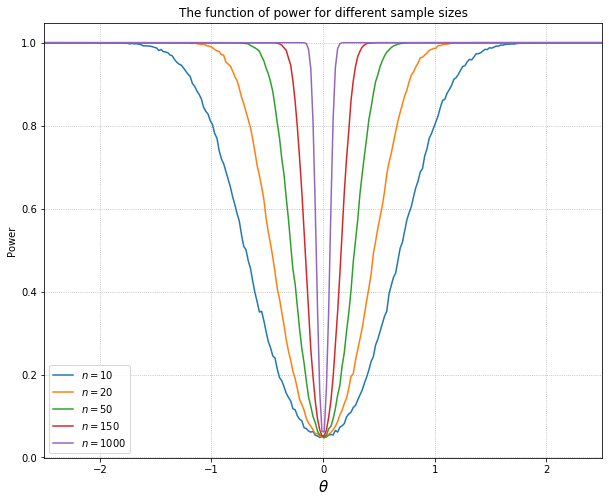

In [26]:
plt.figure(figsize=(10, 8))

for n in N:
    probabilities = [] #array of power function values for a given sample size

    for t in theta: #for each theta from the grid
        
        stats_Student =  calculate_Student(n, t)#Statistics of Student test for each sample
        
        #here we get one point on the graph
        probabilities.append(np.mean(stats_Student > sps.t.ppf(1 - alpha/2, df=n-1)))
        
    plt.plot(theta, probabilities, label='$n={}$'.format(n))
    
plt.title('The function of power for different sample sizes')
plt.xlabel('$\\theta$', fontsize=15)
plt.ylabel('Power')
plt.xlim(-2.5, 2.5)
plt.legend()
plt.grid(ls=':')
plt.show()

The probability of an error of the first kind is fixed as the value $\alpha$, since this is the value of the power function calculated under the null hypothesis $H_0 = \theta_0$. The probability of an error of the second kind is equal to: $$P_{\theta_1}(X \notin S) = 1 - P_{\theta_1}(X \in S) = 1 - P_{\theta_1}\left(\left|\sqrt{n - 1}\frac{\overline{X} - \theta_0}{s}\right| > t_{1-\alpha/2}\right) = P_{\theta_1}\left(\left|\sqrt{n - 1}\frac{\overline{X} - \theta_0}{s}\right| \leqslant t_{1-\alpha/2}\right).$$

Consider the case of testing the hypothesis $H_0:$ $\theta = \theta_0$ against $H_1:$ $\theta = \theta_1$, where $\theta_1 = \theta_0 + 1$. It is clear that, since the expression for the Student test includes a module, consideration of such hypotheses is equivalent to the case of testing the hypothesis $H_0:$ $\theta = \theta_0$ against $H_1:$ $\theta = \theta_1$, where $\theta_1 = \theta_0 - 1$. Consideration of the problem in this formulation is consistent with the condition $|\theta_0 - \theta_1| = 1$.

For each $ \theta_0 = \theta_1-1$ from the previously used grid, we will calculate the value of the Student statistics from the normal distribution with the mathematical expectation $\theta_1$ and calculate the probability of a second kind of error. If we find such a $n$ that the probability of an error of the second kind is less than the probability of an error of the first kind, we will write $n$ in an array of minimum values.

In [27]:
min_n = []

for t_0 in theta:
    t = t_0 + 1
    for n in range(2, 31): #let's take a small range n, since test is consistent
        stats_Student = calculate_Student(n, t, t_0)
        
        false_negative_probability = np.mean(stats_Student <= sps.t.ppf(1 - alpha/2, df=n-1))
        
        if false_negative_probability < alpha:
            min_n.append(n)
            break

Let's build a histogram of the found minimum values $n$. The vertical axis indicates the number of different $\theta$ for which the corresponding value $n$ determines the reduction of the second-order error relative to the first-order error.

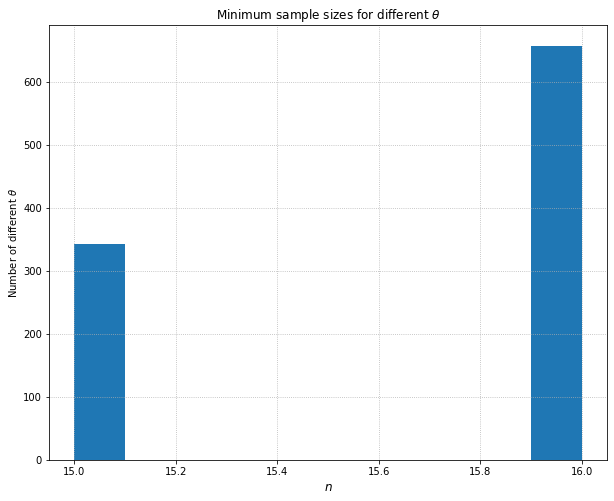

In [28]:
plt.figure(figsize=(10, 8))
plt.hist(min_n)

plt.title('Minimum sample sizes for different $\\theta$')
plt.xlabel('$n$', fontsize=12)
plt.ylabel('Number of different $\\theta$')
plt.grid(ls=':')
plt.show()

## Conclusion

As a result of this work, the dependence of the behavior of the power function of the Student test for testing the hypothesis $H_0: \theta = 0$ for different values of sample sizes was investigated. The graph clearly shows that with the already small increase in the number of $n$, the power function tends more and more to one, which indicates the consistency of the Student test.

Next, we investigated at what minimum values $n$ when testing the hypothesis $H_0:$ $\theta = \theta_0$ versus $H_1:$ $\theta = \theta_1$, where $|\theta_0 - \theta_1| = 1$ the probability of a second-order error is less than the probability of a first-order error. The histogram clearly shows that even with small values of sample sizes ($16$), this ratio is achieved. As you know, the probability of the first kind of error is what we set ourselves as the level of significance of the criterion, and, as a rule, this value of $\alpha$ is small (in our case, $0.05$). This means that when using the Student test, with a small number of sample elements, the probability that we will not accept the wrong hypothesis is at least $0.95$ in our case.